# HW3 

### Name : Ehsan Hassanbeygi
### Student id : 402211723


In this exercise you will implement **M**ulti**L**ayer **P**erceptron(MLP) using numpy. And then you will train an MLP on MNIST dataset for binary classification.

### imports

In [2]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score

# 1.Forward and Backward for each layer type in MLP

In order to compute the gradients of learnable parameter of your MLP, you should implement backpropagation. To to this you should implement `forward` and `backward` functions for each layer type. During training the loss will be computed in forward pass . And then in the backward pass the gradients $\frac{\partial{L}}{\partial{W}}$ for each learnable parameter($w$) will be computed using chain rule.($L$ is scalar loss, $W$ is learnable parameter for which we want to compute gradients and $Y$ is the output of the layer)

Chain Rule : $\frac{\partial{L}}{\partial{W}}=\frac{\partial{L}}{\partial{Y}}\frac{\partial{Y}}{\partial{W}}$

There are 3 layer types in an MLP: 

1. Linear Layers(also known as Fully Connected or Dense layers)
2. Activation functions(e.g. Sigmoid, Tanh, ReLU, ...)
3. Loss Function(BinaryCrossEntropyLoss)

Now, you should implement `forward()` and `backward()` for each layer.

Helpful notes : 
1. the shape of the gradients is the same as the shape as the parameter themselves(`W.shape=dW.shape` for each learnable parameter $W$)

## 1.1. Linear Layers
A linear layer is a set of $N$ neurons. Each neuron linearly transforms the input features. This neurons together will create the Linear layer.

The input of the linear layer is of shape BxM, where B is batch-size and M is the number of input features. The weight of the linear layer($W$) is an MxN matrix. 

In the forward pass you should compute the output `out = xW+b`.

In the backward pass you should compute $\frac{\partial{L}}{\partial{W}}$, $\frac{\partial{L}}{\partial{b}}$ and $\frac{\partial{L}}{\partial{x}}$.

`backward()` returns $\frac{\partial{L}}{\partial{x}}$, which previous layer would be use as its $\frac{\partial{L}}{\partial{Y}}$.

**Important Note**: During the forward pass you can use `self.cache` to store whatever you need in order to compute the gradients in the backward pass.

In [3]:
class Linear:
    def __init__(self, in_features, out_features):
        self.W = np.random.randn(in_features, out_features) #weights 
        self.b = np.random.randn(out_features, ) #biases
        self.dW = None #gradients of Loss with respect to weights(dL/dW)
        self.db = None #gradients of Loss with respect to biases(dL/db)
        self.cache = {}
        
    def __repr__(self):
        return f'Linear({self.W.shape[0]},{self.W.shape[1]})'
        
    def forward(self, x):
        """
        x : input array of shape (batch-size x in_features)
        out = output of the layer after linear transformation
        """
        # added
        out = np.dot(x, self.W) + self.b
        self.cache['x'] = x

        return out


    def backward(self, dout):
        """
        dout : gradients of Loss with respect to this layer's outputs. (dL/dY)
        dx : gradients of Loss with respect to this layer's inputs. (dL/dx)
        """
        # added
        self.dW = np.dot(self.cache['x'].T, dout)
        dx = np.dot(dout, self.W.T)
        self.db = np.sum(dout, axis=0)
        # alternative way to calculate self.db
        # self.db = np.dot(dout.T, np.ones((dout.shape[0], 1))).T

        return dx


### Test for Linear Layer 

You can test your implementation of linear layer in the following cell.

the difference between the correct answer and your results should be very small.(norm of the difference should be less than 10e-6)

In [4]:
np.random.seed(42)
B,M,N = 4,3,2
linear = Linear(M,N)
x = np.random.randn(B,M)
dout = np.random.randn(B,N)
output = linear.forward(x)
dx = linear.backward(dout)
correct_output = np.array([[ 1.80593898,  1.76718463],
       [ 1.95259547,  1.64831391],
       [ 0.59539235,  0.38668979],
       [ 1.4778828 , -0.32828975]])
correct_dW = np.array([[-0.14221564,  0.69627356],
       [ 2.16277123, -0.87074574],
       [ 1.3685123 ,  2.18762574]])
correct_dx = np.array([[ 0.75922529,  0.60541986, -0.29032403],
       [ 0.23053403, -2.12619678,  0.31777425],
       [-0.28573924, -0.18365204,  0.10149797],
       [-0.62366042, -0.17328605,  0.18154424]])
correct_db = np.array([-0.16219933, -1.16390388])

print(f'Output error(forward pass): {np.linalg.norm(correct_output - output)}')
print(f'dW error: {np.linalg.norm(correct_dW - linear.dW)}')
print(f'db error: {np.linalg.norm(correct_db - linear.db)}')
print(f'dx error: {np.linalg.norm(correct_dx - dx)}')


Output error(forward pass): 8.659947536414722e-09
dW error: 6.405965027075992e-09
db error: 2.1446962596316095e-09
dx error: 9.099648788366998e-09


## 1.2. Sigmoid Activation Function
Similar to Linear layer, the input `x` is an (B,M) numpy array. The output of the sigmoid activation layer is also an (B,M) numpy array.

In the forward pass you should apply sigmoid non-linearity to the input features.

In the backward pass you should compute the gradient of Loss with respect to the input features($\frac{\partial{L}}{\partial{x}}$). You need to use chain rule and dout ($\frac{\partial{L}}{\partial{Y}}$) that comes from the next layer.

**Important Note**: During the forward progagation you can use `self.cache` to store whatever you need in order to compute the gradients in the backward pass.

In [5]:
class Sigmoid:
    def __init__(self):
        self.cache = {}

    def __repr__(self):
        return 'Sigmoid'
    
    def forward(self, x):
        """
        x : input array 
        out : result of applying sigmoid non-linearity to x
        """
        # added
        out = 1 / (1 + np.exp(-x))
        self.cache['x'] = x
        
        return out

    def backward(self, dout):
        """
        dout : gradients of Loss with respect to this layer's outputs. (dL/dY)
        dx : gradients of Loss with respect to this layer's inputs. (dL/dx)
        """
        # added
        local_gradient = self.forward(self.cache['x']) * (1 - self.forward(self.cache['x']))
        
        # alternative way to calculate local gradient
        # local_gradient = np.exp(-self.cache['x']) / np.power(1 + np.exp(-self.cache['x']), 2)
        dx = local_gradient * dout

        return dx


### Test for Sigmoid

You can test your implementation of Sigmoid layer in the following cell.

the difference between the correct answer and your results should be very small.(norm of the difference should be less than 10e-6)

In [6]:
np.random.seed(42)
B,M = 4,3
x = np.random.randn(B,M)
sigmoid = Sigmoid()
dout = np.random.randn(B,M)
output = sigmoid.forward(x)
dx = sigmoid.backward(dout)
correct_output = np.array([[0.62168683, 0.46548889, 0.65648939],
       [0.82098421, 0.44172766, 0.44173171],
       [0.829093  , 0.68296571, 0.38474066],
       [0.63240775, 0.38617537, 0.38562745]])
correct_dx = np.array([[ 0.05690767, -0.47604131, -0.38898807],
       [-0.08263891, -0.24976854,  0.0774949 ],
       [-0.12866501, -0.30579701,  0.34694146],
       [-0.05248581,  0.01600715, -0.3375498 ]])
print(f'Output error(forward pass): {np.linalg.norm(correct_output - output)}')
print(f'dx error: {np.linalg.norm(correct_dx - dx)}')

Output error(forward pass): 1.0374121678625628e-08
dx error: 9.878633343796564e-09


## 1.3. Binary Cross Entropy Loss

Unlike previous layer types, the binary cross entropy loss takes two arguments in its forward pass :
1. input : This is a Bx1 NumPy array, which represents the output of the previous Sigmoid Layer. Essentially, this array serves as the model's prediction, where each element denotes the probability of the label being 1.
2. target : This is a vector of size B, where each element represents the correct class of the input image (either 0 or 1).

In the forward pass, you should compute the binary cross entropy loss using the input probabilities and the target vector.


In the backward pass you should compute the gradient of Loss with respect to the input features($\frac{\partial{L}}{\partial{\text{input}}}$).

**Important Notes**: 

1. Similar to Sigmoid and Linear layers, you can store any intermediate results(hint: `input` and `target`) in `self.cache` during forward pass and later use them in backward pass to compute the gradients.
2. You should return both `probs` and `loss` in your `forward` function. 
3. `probs` is the squeezed version of `input` (you can squeeze `input` using `.squeeze()`). Remember that dimension of `input` is Bx1 and by squeezing it it will become a vector of size B.
4. The shape of `dx` should be Bx1

In [7]:
class BinaryCrossEntropyLoss:
    def __init__(self) :
        self.cache = {} 

    def forward(self,input,target):
        # added
        probs = input.squeeze()
        
        loss = -np.mean(
            target * np.log(probs)
            + (1 - target) * np.log(1 - probs)
            )
        
        self.cache['probs'] = probs
        self.cache['target'] = target

        return loss, probs  

    def backward(self):
        # added
        target = self.cache['target']
        probs = self.cache['probs']

        dx = (probs - target) / (probs * (1 - probs))
        dx /= len(probs)
        dx = dx.reshape(-1,1)

        return dx

### Test for Binary Cross Entropy Loss

You can test your implementation of Binary Cross Entropy Loss in the following cell.

the difference between the correct answer and your results should be very small.(norm of the difference should be less than 10e-6)

In [8]:
np.random.seed(42)
B = 4
M = 1
  
x = np.random.rand(B,M)
y = np.random.randint(0, M+1, (B, ))
BCE = BinaryCrossEntropyLoss()

loss, _ = BCE.forward(x, y)
dx = BCE.backward()

correct_dx = np.array([[ 0.39970589],
       [-0.26296017],
       [ 0.93281473],
       [ 0.62291089]])
correct_loss = 0.6873745031844983
print('Loss error:', np.abs(loss - correct_loss))
print('dx error:', np.linalg.norm(dx - correct_dx))

Loss error: 0.0
dx error: 7.1397382603248244e-09


# 2. Creating Model

The following cell defines the Model class. A Model has some modules/layers  (`self.modules`). This modules are ordered and create our MLP network. For instance, if the modules in the Model are `[Linear(784,200),Sigmoid(),Linear(200,1),Sigmoid()]`, means that the model is a two layer MLP where the shape of the input is 784. There is a hidden layer with hidden dimension of 200.

The `forward()` function, propagates inputs (`X`) of the network ,from the first layer to last layer sequentialy and then computes the loss using targets (`Y`) and the given loss function `loss_fn`. This function returns loss and the computed probabilities for the input batch.

The `backward()` function propagates gradients from `dx` computed in the loss function backwards to the weights and biases of the first layer.

The `update_weights()` function update weights using SGD and a given learning rate.

The `evaluate()` function computes the loss and accuracy, given a batch of inputs and their corresponding targets.

**Note** : This Model class is implemented for you and you don't need to change this cell.

In [9]:
class Model:

    def __init__(self,modules,loss_fn):
        self.modules = modules
        self.loss_fn = loss_fn
        
    def __repr__(self):
        return ','.join([str(m) for m in self.modules ])

    def forward(self,X,Y):
        
        for module in self.modules:
    
            X = module.forward(X)
        
        loss,probs = self.loss_fn.forward(X,Y)
        return loss,probs
    
    def backward(self):
        dout = self.loss_fn.backward()
        for module in reversed(self.modules):
            dout = module.backward(dout)
        
    def update_weights(self, lr):

        for module in self.modules: 
            if isinstance(module,Linear):
                module.W = module.W - lr*module.dW
                module.b = module.b - lr*module.db


    def evaluate(self,x_eval,y_eval):
        
        loss , probs = self.forward(x_eval,y_eval)
        
        preds = (probs >= .5).astype('int')
        acc = accuracy_score(y_eval,preds)

        return {
            'loss' : loss,
            'acc' : acc
        }

# 3. Loading, Visualizing and Preparing Data

The MNIST dataset is a collection of 60,000, 28x28 pixel grayscale images of handwritten digits (0-9). We will use this dataset to train our MLP to classify this images.

we use tensorflow to download and load the dataset

In [37]:
from tensorflow.keras.datasets import mnist 
import matplotlib.pyplot as plt
from IPython.display import display,clear_output

In [38]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


The following cell gets the first 10 images of each class in the training data and visualizes them.

(-0.5, 279.5, 279.5, -0.5)

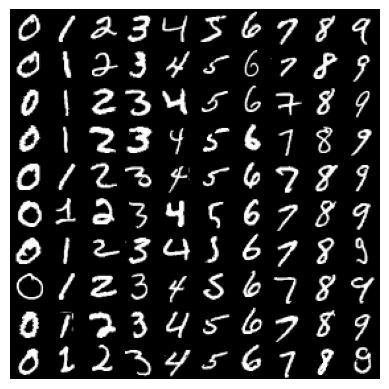

In [39]:
images = []
for i in range(10):
    image_indicies = np.where(y_train == i)[0][:10]
    images.append(x_train[image_indicies].reshape(-1,28))
images = np.hstack(images)
plt.imshow(images,cmap='gray')
plt.axis('off')


As you see from the above cells, the images in our dataset are 28x28 pixels. However, the Linear layers in MLP accept 1 dimensional inputs. There you should flatten the images to become one dimensional.

In the following cell you should flatten the images(you can use `.reshape`).

In [40]:
# added
x_train = x_train.reshape(x_train.shape[0],-1,1).squeeze()
x_test = x_test.reshape(x_test.shape[0],-1,1).squeeze()

In [41]:
print(np.max(x_train),np.min(x_train))

255 0


As you can see from the above cell, the values of pixels are integers between 0 and 255. But for better training(more stable training) we can normalize our data so that the pixel values are between 0 and 1.

To to this run the cell bellow. 

In [42]:
x_train = x_train / 255
x_test = x_test / 255
print(np.max(x_train),np.min(x_train))

1.0 0.0


## 3.2 Splitting data for binary classification
There are 10 classes in MNIST dataset, however we want to perform binary classification. In order to do this we only keep images and labels of 3 and 7. They labels should also get transformed so that they are binary (0 and 1). 0 will correspond to 3 and 1 will correspond to 7. Meaning that, if the output of the model is 1 then the prediction is 7 and if it's 0 then the prediction is 3.



In the following cell, you should transform x_train,y_train,x_test,y_test in a way that only images/labels of 3 and 7 are included.

There should be 12396 images/labels in your training data and 2038 images/labels in your test data.

Name this new data arrays as x_train_new, x_test_new, y_train_new and y_test_new.


In [47]:
# added
x_train_new = x_train[(y_train == 3) | (y_train == 7)]
x_test_new = x_test[(y_test == 3) | (y_test == 7)]
y_train_new = y_train[(y_train == 3) | (y_train == 7)]
y_train_new[y_train_new == 3] = 0
y_train_new[y_train_new == 7] = 1
y_test_new = y_test[(y_test == 3) | (y_test == 7)]
y_test_new[y_test_new == 3] = 0
y_test_new[y_test_new == 7] = 1

assert x_train_new.shape == (12396, 784)
assert x_test_new.shape == (2038,784)

Now visualize 10 images in each class(3 and 7) 

(-0.5, 55.5, 279.5, -0.5)

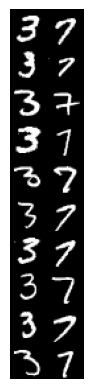

In [48]:
images = []
for i in [0,1]:
    image_indicies = np.where(y_train_new == i)[0][:10]
    images.append(x_train_new[image_indicies].reshape(-1,28))
images = np.hstack(images)
plt.imshow(images,cmap='gray')
plt.axis('off')

# 4.Training and Evaluating Model

The following cell creates a two layer MLP and trains it on MNIST dataset for 100 epochs. you can see loss and accuracy for both train and test datasets.

**Note**: training and validation loops are implemented for you and you don't need to change the next cell. However you experiment by can changing the model architecture by adding additional layers, changing hidden dimension or by changing the learning rate, ... .

,loss_train,acc_train,loss_test,acc_test
0,7.504855,0.490239,7.636599,0.486261
1,3.409142,0.474508,3.544025,0.469087
2,1.976171,0.559455,2.099893,0.549068
3,1.692385,0.602049,1.799753,0.586359
4,1.466416,0.638996,1.558981,0.626595
...,...,...,...,...
96,0.192146,0.942401,0.217147,0.941609
97,0.191214,0.942643,0.216319,0.941609
98,0.190296,0.943207,0.215505,0.942591
99,0.189393,0.943611,0.214703,0.942591


<Axes: >

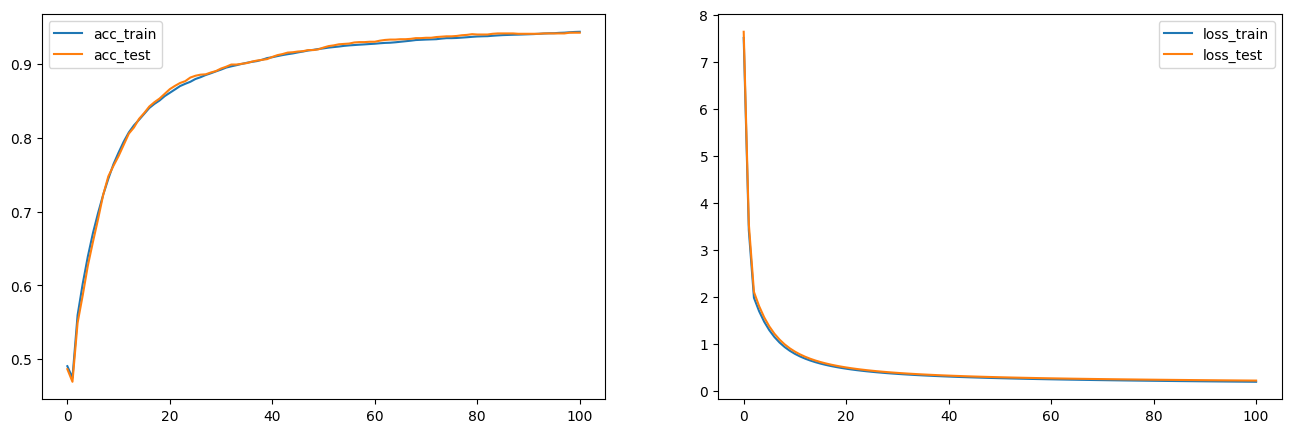

In [49]:
#model definition 
criterion = BinaryCrossEntropyLoss()
mlp = Model([Linear(784,200),Sigmoid(),Linear(200,1),Sigmoid()],loss_fn = criterion)


train_results  = []
test_results = []
EPOCHS = 100

train_results.append(mlp.evaluate(x_train_new,y_train_new))
test_results.append(mlp.evaluate(x_test_new,y_test_new))

for epoch in range(EPOCHS): 
    loss, preds =  mlp.forward(x_train_new,y_train_new)
    
    mlp.evaluate(x_train_new,y_train_new)
    mlp.backward()
    mlp.update_weights(.2)
    
    train_results.append(mlp.evaluate(x_train_new,y_train_new))
    test_results.append(mlp.evaluate(x_test_new,y_test_new))
    clear_output()
    display(pd.merge(pd.DataFrame(train_results),pd.DataFrame(test_results),left_index=True,right_index=True,suffixes=['_train','_test']))

results = pd.merge(pd.DataFrame(train_results),pd.DataFrame(test_results),left_index=True,right_index=True,suffixes=['_train','_test'])
fix,(ax1,ax2)  = plt.subplots(1,2,figsize=(16,5))
results[['acc_train','acc_test']].plot(ax=ax1)
results[['loss_train','loss_test']].plot(ax=ax2)